<div style="text-align: left;"><img src="https://i.imgur.com/BC2sAdw.png" align="left" width="200" title="Universiteit Leiden"/ ></div>

<font color='#0C2577'><b>Improving the age at onset estimation for Huntington’s Disease using Machine Learning models on top of the Enroll-HD data</b></font>

<left><font color='#0C2577'>JC Marchiori Dias – BioInformatics Master Thesis 2023/2024 - Notebook 5</font></left> 

<left><font color='#0C2577'>Leiden University - LUMC BioSemantics Group</font></left>

#### Import Libraries

In [1]:
## Importing Relevant Python Libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import methods.HD_AAO_Estim_Improv_Methods as aao


#### Options for the notebook

In [2]:
## Set options for pandas
# to have better/more output from lists/dataframes

pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)

In [16]:
# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['savefig.dpi'] = 600

#### Group Features Definition

In [4]:
## Grouping of different features provided by Enroll-HD

patient_features =  ['caghigh', 'caglow', 'parenthd_impFill', 'region_impFill', 'parentagesx_impFill', 'sex', 'race',
                     'handed_impFill', 'weight_filled_impFill', 'height_filled_impFill']

others = ['rtrddur_filled_impFill', 'age', 'cap_score', 'bmi_new_impFill', 'packy_impFill', 'hxpacky_impFill',
          'cUHDRS', 'alcab_filled_impFill', 'tobyos_impFill', 'tobcpd_impFill', 'patient_alive_impFill']

under_eval = ['tobab_filled_impFill']

lifestyle_features = ['isced_filled_impFill', 'maristat_filled_impFill', 'res_filled_impFill', 'jobclas_filled_impFill',
                      'emplnrsn_filled_impFill', 'nmdrg_filled_impFill', 'nmdrgfrq_filled_impFill', 'cafab_filled_impFill',
                      'cafpd_filled_impFill', 'hxalcab_filled_impFill', 'alcunits_filled_impFill', 'hxtobab_filled_impFill',
                      'hxtobcpd_impFill', 'hxtobyos_impFill']

assessm_features = ['pbashalsm_1', 'pbashalsm_2', 'pbashalsm_3', 'pbashalsm_4', 'pbashalsm_5', 'pbasaptsv_impFill',
'pbasdelfr_impFill', 'pbashalsv_impFill', 'pbashalfr_impFill', 'swrt_impFill', 'sbh7_impFill', 'scnt_impFill',
'pbasaptfr_impFill', 'ccvab_impFill', 'pbasirrsv_impFill', 'ccdep_impFill', 'ccpsy_impFill', 'cccog_impFill', 
'sit_impFill', 'carelevl_impFill', 'ccapt_impFill', 'sdmt_impFill', 'finances_impFill', 'pbasaggfr_impFill',
'pbasocsv_impFill', 'ccpob_impFill', 'occupatn_impFill', 'ccirb_impFill', 'adl_impFill', 'pbaspersv_impFill',
'pbasirrfr_impFill', 'pbasocfr_impFill', 'pbasperfr_impFill', 'emplusl_impFill', 'verflt_impFill', 'pbassidsv_impFill', 
'pbasdepfr_impFill', 'pbasaggsv_impFill', 'pbasdelsv_impFill', 'emplany_impFill', 'verfct_impFill', 'chores_impFill', 
'pbasdepsv_impFill', 'pbasanxfr_impFill', 'pbasanxsv_impFill', 'drive_impFill', 'fafinan_impFill', 'bed_impFill',
'pbassidfr_impFill', 'toilet_impFill', 'pbasdisbsv_impFill', 'bathe_impFill', 'sbh_filled_impFill', 
'housewrk_impFill', 'trnchair_impFill', 'supchild_impFill', 'volunt_impFill', 'laundry_impFill', 'grocery_impFill',
'dress_impFill', 'pbasdisbfr_impFill', 'pubtrans_impFill', 'walknbr_impFill', 'cash_impFill', 'prepmeal_impFill',
'comb_impFill', 'telephon_impFill', 'ownmeds_impFill', 'feedself_impFill', 'walkhelp_impFill', 'int1_filled_impFill',
'chorrle_impFill', 'sacvelh_impFill', 'chorlle_impFill', 'carehome_impFill', 'chorrue_impFill', 'chorlue_impFill', 
'dystlle_impFill', 'dystrle_impFill', 'sacvelv_impFill', 'hxsid_impFill', 'rdcwk_filled_impFill', 'sacinitv_impFill', 
'sacinith_impFill', 'walkfall_impFill', 'dystlue_impFill', 'prosupr_impFill', 'dystrue_impFill', 'ocularh_impFill',
'ocularv_impFill', 'prosupl_impFill', 'fingtapl_impFill', 'fingtapr_impFill', 'gait_impFill', 'rigarml_impFill', 
'dysarth_impFill', 'rigarmr_impFill', 'gen1_impFill', 'chorbol_impFill', 'brady_impFill', 'dysttrnk_impFill', 
'chorface_impFill', 'tandem_impFill', 'tongue_impFill', 'chortrnk_impFill', 'retropls_impFill', 'pbainfo_impFill',
'verfct5_impFill', 'indepscl_impFill', 'scnt1_impFill', 'sdmt1_impFill', 'luria_impFill', 'swrt1_impFill', 'sit1_impFill',
'sxmajor_sym_impFill', 'verflt05_impFill', 'verfct6_impFill', 'verflt07_impFill', 'verflt06_impFill', 'sit2_impFill',
'scnt3_impFill', 'sit3_impFill', 'sdmt2_impFill', 'scnt2_impFill', 'swrt3_impFill', 'swrt2_impFill', 'verfct7_impFill',
'ccmtr_impFill']

score_features = ['motscore_impFill', 'tfcscore_impFill', 'fascore_impFill', 'depscore_new_impFill', 
'irascore_new_impFill', 'psyscore_new_impFill', 'aptscore_new_impFill', 'exfscore_new_impFill']

onset_features = ['ccmtrage', 'sxsubj', 'sxfam', 'hddiagn', 'sxrater', 'sxgs', 'sxgsdy', 'ccdepage', 'ccirbage', 'ccvabage', 
'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']

study_features = ['patient_num', 'subjid', 'studyid', 'year_seq', 'visdy', 'hdcat_0', 'hdcat_l', 'hdcat_impFill', 
'evtnum_filled', 'diagconf_impFill']

reduced_features = ['age', 'caghigh', 'parentagesx_impFill', 'nmdrgfrq_filled_impFill', 'maristat_filled_impFill',
                    'emplnrsn_filled_impFill', 'alcunits_filled_impFill']

In [5]:
## Variable categorization of different features provided by Enroll-HD

bool_cols = ["alcab_filled", "bathe", "bed", "cafab_filled", "cafpd_filled", "carehome", "cash", "ccapt", "cccog", "ccdep", "ccirb",
                 "ccmtr", "ccpob", "ccpsy", "ccvab", "comb", "dress", "drive", "emplany", "emplusl", "fafinan", "feedself", "gen1",
                 "grocery", "housewrk", "hxalcab_filled", "hxsid", "hxtobab_filled", "laundry", "nmdrg_filled", "ownmeds", "parenthd",
                 "patient_alive", "pbashalsm_1", "pbashalsm_2", "pbashalsm_3", "pbashalsm_4", "pbashalsm_5", "prepmeal", "pubtrans",
                 "rdcwk_filled", "sbh_filled", "sbh7", "scnt", "sdmt", "sit", "supchild", "swrt", "telephon", "tobab_filled", "toilet",
                 "trl", "trnchair", "verfct", "verflt", "volunt", "walkfall", "walkhelp", "walknbr"]  # 59 Boolean columns

catg_cols = ["handed", "res_filled", "jobclas_filled", "maristat_filled", "race", "pbainfo", "emplnrsn_filled", "sxmajor_sym",
                 "hdcat", "hdcat_0", "hdcat_l", "region", "sex", "studyid"]  # 14 Categorical columns

ordn_cols = ["adl", "brady", "carelevl", "chorbol", "chores", "chorface", "chorlle", "chorlue", "chorrle", "chorrue",
                 "chortrnk", "diagconf", "dysarth", "dystlle", "dystlue", "dystrle", "dystrue", "dysttrnk", "finances", "fingtapl",
                 "fingtapr", "gait", "indepscl", "int1_filled", "isced_filled", "luria", "nmdrgfrq_filled", "occupatn", "ocularh", "ocularv", "pbasaggfr",
                 "pbasaggsv", "pbasanxfr", "pbasanxsv", "pbasaptfr", "pbasaptsv", "pbasdelfr", "pbasdelsv", "pbasdepfr", "pbasdepsv",
                 "pbasdisbfr", "pbasdisbsv", "pbashalfr", "pbashalsv", "pbasirrfr", "pbasirrsv", "pbasocfr", "pbasocsv", "pbasperfr",
                 "pbaspersv", "pbassidfr", "pbassidsv", "prosupl", "prosupr", "retropls", "rigarml", "rigarmr", "sacinith", "sacinitv",
                 "sacvelh", "sacvelv", "year_seq", "tandem", "tongue"]  # 64 Categorical Ordinal columns // 'seq' is changed to the new version: 'year_seq'

numr_cols = ["age", "alcunits_filled", "aptscore_new", "bmi_new", "caghigh", "caglow",  "ccaptage", "cccogage", "ccdepage",
                 "ccirbage", "ccmtrage", "ccpobage", "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore",
                 "fiscore", "height_filled", "hxpacky", "hxtobcpd", "hxtobyos", "irascore_new", "miscore", "motscore", "packy",
                 "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3",
                 "verfct5", "verfct6", "verfct7", "verflt05", "verflt06", "verflt07", "visdy", "weight_filled"]  # 58 Numeric columns

intg_cols = ["age", "aptscore_new", "caghigh", "caglow", "ccaptage", "cccogage", "ccdepage", "ccirbage", "ccmtrage", "ccpobage",
                 "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore", "fiscore", "hxtobcpd", "hxtobyos", "irascore_new",
                 "miscore", "motscore", "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3", "verfct5", "verfct6",
                 "verfct7", "verflt05", "verflt06", "verflt07", "visdy"]  # 52 integer columns --> subset of numeric columns



#### Loading Dataset

In [6]:
## Import of pre-processed and imputed data, created by LUMC BioSemantics Group
# Enroll-HD dataset is available after the associated Consortium evaluation and approval, therefore this data cannot be 
# found elsewhere and its location here is private. 

hd_imputed_df = pd.read_csv("~/Study/HD/my_project/hd_workflow_data/data_output/aao_feature_all/imputed_dfs/New_All_cases.csv", index_col="patient_num")

#### Filtering Data - Target: ccmtrage 

In [7]:
## Patients considered genetic carrier

feat_model_df = hd_imputed_df[(hd_imputed_df['caghigh'] >= 35)]


In [8]:
## Only manifested patients that were enrolled as pre-manifested

feat_model_df = feat_model_df[(feat_model_df['hdcat_l'] == 3.0) & 
                              (feat_model_df['hdcat_0'] == 2.0) &
                              (feat_model_df['hdcat_impFill'] == 3.0)]

feat_model_df['ccmtrage'].fillna(feat_model_df['hddiagn'], inplace=True)
feat_model_df['ccmtrage'].fillna(feat_model_df['sxrater'], inplace=True)
feat_model_df['ccmtrage'].fillna(feat_model_df['sxfam'], inplace=True)
feat_model_df['ccmtrage'].fillna(feat_model_df['sxsubj'], inplace=True)

In [9]:
## Create Study Dataset (from PostProcessed training Stage1 file)
## Target: ccmtrage

target_pp = ['ccmtrage']
columns_pp = patient_features + lifestyle_features

feat_model_df = feat_model_df.groupby('subjid').first()[target_pp + columns_pp]
feat_model_df = feat_model_df.reset_index()
feat_model_df.dropna(subset = ['ccmtrage'], inplace=True)
feat_model_df

,subjid,ccmtrage,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
0,1347826,68.0,41,15,1.0,3,59.0,1,0.0,0.0,68.0,167.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2593663,52.0,42,20,1.0,3,60.0,0,0.0,0.0,80.0,178.0,4.0,2.0,3.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5033118,56.0,43,23,1.0,3,43.0,0,0.0,0.0,73.0,183.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0
3,5796487,50.0,42,18,1.0,3,65.0,0,0.0,0.0,68.0,170.0,1.0,3.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,18.0,20.0
4,5895058,43.0,45,25,1.0,1,50.0,0,0.0,0.0,79.4,170.0,5.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,988755452,43.0,41,19,1.0,3,54.0,0,0.0,0.0,75.0,180.0,3.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
885,995587389,36.0,48,18,1.0,1,32.0,0,0.0,0.0,69.9,177.8,3.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,21.0
886,996268693,43.0,46,22,1.0,3,55.0,0,0.0,0.0,71.1,180.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,25.0,1.0,12.0,16.0
887,996629325,53.0,42,17,1.0,3,60.0,0,0.0,0.0,75.5,182.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,16.0,0.0,0.0,0.0


In [10]:
## Execute Feature Selection using 3 different Models (SelectKBest, Mutual Information and Lasso)

fs_results_sk, fs_results_mi, fs_results_ls = aao.select_features(feat_model_df, target_pp, columns_pp)

## Percentage Calculation and Agregation of results

fs_results_sk['Select KBest'] = (fs_results_sk['score']*100/fs_results_sk['score'].sum())
fs_results_mi['Mutual Information'] = (fs_results_mi['score']*100/fs_results_mi['score'].sum())
fs_results_ls['Lasso'] = (fs_results_ls['score']*100/fs_results_ls['score'].sum())

fs_results_sk['Cumulative Select KBest'] = fs_results_sk['Select KBest'].cumsum()
fs_results_mi['Cumulative Mutual Information'] = fs_results_mi['Mutual Information'].cumsum()
fs_results_ls['Cumulative Lasso'] = fs_results_ls['Lasso'].cumsum()

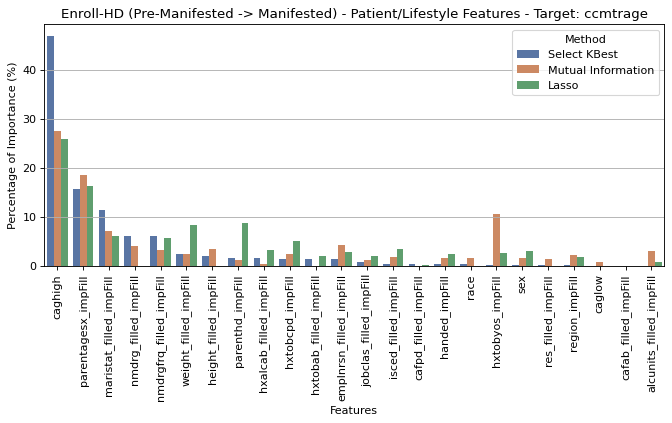

In [76]:
## Graph showing the feature selection results

res1 = pd.merge(fs_results_sk, fs_results_mi, on=['feature'])
res2 = pd.merge(res1, fs_results_ls, on=['feature'])
res2 = res2.drop(columns=['target_x', 'score_x', 'target_y', 'score_y', 'target', 'score'])
res3 = pd.melt(res2[['feature','Select KBest', 'Mutual Information', 'Lasso']], id_vars = "feature")
res3.rename(columns={"variable": "Method"}, inplace=True)
                   
fig, axs = plt.subplots(1, 1, figsize=(10,4))
sns.barplot(data=res3, x="feature", y="value", hue='Method', palette="deep")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Importance (%)')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Patient/Lifestyle Features - Target: ccmtrage')
plt.grid(axis='y')
plt.show()

#### Evaluate the HDDiagn Model to the new target: ccmrtage

In [12]:
# Define Columns to be used
target_pp = ['ccmtrage']
extras_pp = ['subjid', 'hddiagn', 'sxrater', 'sxfam', 'sxsubj', 'hdcat_0', 'hdcat_l', 'hdcat_impFill']
columns_pp = patient_features + lifestyle_features 

final_feat_df = hd_imputed_df.loc[:, extras_pp + target_pp + columns_pp]
final_feat_df

,subjid,hddiagn,sxrater,sxfam,sxsubj,hdcat_0,hdcat_l,hdcat_impFill,ccmtrage,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
patient_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15945,103720,64.0,60.0,60.0,60.0,3.0,3.0,3.0,61.0,41,22,0.0,1,105.0,0,0.0,0.0,99.2,188.0,3.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0
15946,103720,64.0,60.0,60.0,60.0,3.0,3.0,3.0,61.0,41,22,0.0,1,105.0,0,0.0,0.0,97.5,188.0,3.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0
15947,103720,64.0,60.0,60.0,60.0,3.0,3.0,3.0,61.0,41,22,0.0,1,105.0,0,0.0,0.0,95.9,188.0,3.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
15948,103720,64.0,60.0,60.0,60.0,3.0,3.0,3.0,61.0,41,22,0.0,1,105.0,0,0.0,0.0,93.4,188.0,3.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
15949,103720,64.0,60.0,60.0,60.0,3.0,3.0,3.0,61.0,41,22,0.0,1,105.0,0,0.0,0.0,96.2,188.0,3.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82984,999534341,27.0,27.0,27.0,27.0,2.0,3.0,3.0,27.0,48,18,1.0,3,45.0,1,0.0,0.0,54.0,159.0,2.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0
82985,999534341,27.0,27.0,27.0,27.0,2.0,3.0,3.0,27.0,48,18,1.0,3,45.0,1,0.0,0.0,50.0,159.0,2.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0
82986,999534341,27.0,27.0,27.0,27.0,2.0,3.0,3.0,27.0,48,18,1.0,3,45.0,1,0.0,0.0,48.0,159.0,2.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0


In [13]:
# Split Categorical features from the others

num_columns_pp = []
cat_columns_pp = []

for i in columns_pp:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)    

In [14]:
# Run the OneHotEnconding
drop_cat = True
remain_features = extras_pp + num_columns_pp

oneHotenconded_df, cat_cols = aao.OneHotEncodingFunc(final_feat_df, target_pp, remain_features, cat_columns_pp, drop_cat)

In [15]:
# Train + Test Dataset

final_feat_df = oneHotenconded_df[(oneHotenconded_df['caghigh'] >= 35) & (oneHotenconded_df['hdcat_l'] == 3.0) &
                                  (oneHotenconded_df['hdcat_0'] == 2.0) & (oneHotenconded_df['hdcat_impFill'] == 3.0)]

final_feat_df['ccmtrage'].fillna(final_feat_df['hddiagn'], inplace=True)
final_feat_df['ccmtrage'].fillna(final_feat_df['sxrater'], inplace=True)
final_feat_df['ccmtrage'].fillna(final_feat_df['sxfam'], inplace=True)
final_feat_df['ccmtrage'].fillna(final_feat_df['sxsubj'], inplace=True)

final_feat_df = final_feat_df.groupby('subjid').first()
final_feat_df = final_feat_df.reset_index()
final_feat_df.dropna(subset = ['ccmtrage'], inplace=True)
final_feat_df

,subjid,patient_num,ccmtrage,hddiagn,sxrater,sxfam,sxsubj,hdcat_0,hdcat_l,hdcat_impFill,caghigh,caglow,parenthd_impFill,parentagesx_impFill,weight_filled_impFill,height_filled_impFill,nmdrg_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill,region_impFill_0,region_impFill_1,region_impFill_2,region_impFill_3,sex_0,sex_1,race_0.0,race_1.0,race_2.0,race_5.0,race_7.0,race_14.0,race_15.0,handed_impFill_0.0,handed_impFill_1.0,handed_impFill_2.0,isced_filled_impFill_0.0,isced_filled_impFill_1.0,isced_filled_impFill_2.0,isced_filled_impFill_3.0,isced_filled_impFill_4.0,isced_filled_impFill_5.0,isced_filled_impFill_6.0,maristat_filled_impFill_0.0,maristat_filled_impFill_1.0,maristat_filled_impFill_2.0,maristat_filled_impFill_3.0,maristat_filled_impFill_4.0,maristat_filled_impFill_5.0,res_filled_impFill_0.0,res_filled_impFill_1.0,res_filled_impFill_2.0,res_filled_impFill_3.0,jobclas_filled_impFill_0.0,jobclas_filled_impFill_1.0,jobclas_filled_impFill_2.0,jobclas_filled_impFill_3.0,emplnrsn_filled_impFill_0.0,emplnrsn_filled_impFill_1.0,emplnrsn_filled_impFill_2.0,emplnrsn_filled_impFill_3.0,emplnrsn_filled_impFill_4.0,emplnrsn_filled_impFill_5.0,nmdrgfrq_filled_impFill_0.0,nmdrgfrq_filled_impFill_1.0,nmdrgfrq_filled_impFill_2.0,nmdrgfrq_filled_impFill_3.0
0,1347826,16026,68.0,68.0,68.0,67.0,67.0,2.0,3.0,3.0,41,15,1.0,59.0,68.0,167.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2593663,16124,52.0,53.0,53.0,53.0,53.0,2.0,3.0,3.0,42,20,1.0,60.0,80.0,178.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,5033118,16283,56.0,57.0,57.0,57.0,57.0,2.0,3.0,3.0,43,23,1.0,43.0,73.0,183.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5796487,16321,50.0,49.0,51.0,52.0,NaN,2.0,3.0,3.0,42,18,1.0,65.0,68.0,170.0,0.0,0.0,0.0,1.0,7.0,1.0,18.0,20.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5895058,16334,43.0,45.0,45.0,43.0,NaN,2.0,3.0,3.0,45,25,1.0,50.0,79.4,170.0,0.0,1.0,1.0,0.0,4.0,1.0,20.0,15.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,988755452,82281,43.0,NaN,44.0,NaN,NaN,2.0,3.0,3.0,41,19,1.0,54.0,75.0,180.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
885,995587389,82747,36.0,39.0,37.0,37.0,37.0,2.0,3.0,3.0,48,18,1.0,32.0,69.9,177.8,0.0,1.0,0.0,0.0,0.0,1.0,8.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
886,996268693,82790,43.0,NaN,43.0,43.0,NaN,2.0,3.0,3.0,46,22,1.0,55.0,71.1,180.0,0.0,1.0,1.0,1.0,25.0,1.0,12.0,16.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [16]:
# Validation Dataset

validation_df = oneHotenconded_df[(oneHotenconded_df['caghigh'] >= 35) & (oneHotenconded_df['hdcat_l'] == 3.0) &
                                  (oneHotenconded_df['hdcat_0'] == 3.0) & (oneHotenconded_df['hdcat_impFill'] == 3.0)]

validation_df['ccmtrage'].fillna(validation_df['hddiagn'], inplace=True)
validation_df['ccmtrage'].fillna(validation_df['sxrater'], inplace=True)
validation_df['ccmtrage'].fillna(validation_df['sxfam'], inplace=True)
validation_df['ccmtrage'].fillna(validation_df['sxsubj'], inplace=True)

validation_df = validation_df.groupby('subjid').first()
validation_df = validation_df.reset_index()
validation_df.dropna(subset = ['ccmtrage'], inplace=True)
validation_df

,subjid,patient_num,ccmtrage,hddiagn,sxrater,sxfam,sxsubj,hdcat_0,hdcat_l,hdcat_impFill,caghigh,caglow,parenthd_impFill,parentagesx_impFill,weight_filled_impFill,height_filled_impFill,nmdrg_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill,region_impFill_0,region_impFill_1,region_impFill_2,region_impFill_3,sex_0,sex_1,race_0.0,race_1.0,race_2.0,race_5.0,race_7.0,race_14.0,race_15.0,handed_impFill_0.0,handed_impFill_1.0,handed_impFill_2.0,isced_filled_impFill_0.0,isced_filled_impFill_1.0,isced_filled_impFill_2.0,isced_filled_impFill_3.0,isced_filled_impFill_4.0,isced_filled_impFill_5.0,isced_filled_impFill_6.0,maristat_filled_impFill_0.0,maristat_filled_impFill_1.0,maristat_filled_impFill_2.0,maristat_filled_impFill_3.0,maristat_filled_impFill_4.0,maristat_filled_impFill_5.0,res_filled_impFill_0.0,res_filled_impFill_1.0,res_filled_impFill_2.0,res_filled_impFill_3.0,jobclas_filled_impFill_0.0,jobclas_filled_impFill_1.0,jobclas_filled_impFill_2.0,jobclas_filled_impFill_3.0,emplnrsn_filled_impFill_0.0,emplnrsn_filled_impFill_1.0,emplnrsn_filled_impFill_2.0,emplnrsn_filled_impFill_3.0,emplnrsn_filled_impFill_4.0,emplnrsn_filled_impFill_5.0,nmdrgfrq_filled_impFill_0.0,nmdrgfrq_filled_impFill_1.0,nmdrgfrq_filled_impFill_2.0,nmdrgfrq_filled_impFill_3.0
0,24542,15939,42.0,47.0,42.0,42.0,42.0,3.0,3.0,3.0,44,19,1.0,50.0,67.9,185.4,0.0,1.0,0.0,0.0,8.362,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,103720,15945,61.0,64.0,60.0,60.0,60.0,3.0,3.0,3.0,41,22,0.0,105.0,99.2,188.0,0.0,1.0,1.0,0.0,3.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,147438,15951,76.0,81.0,76.0,77.0,76.0,3.0,3.0,3.0,41,23,1.0,62.0,65.0,169.0,0.0,1.0,1.0,0.0,0.000,1.0,20.0,38.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,239460,15958,65.0,70.0,66.0,70.0,67.0,3.0,3.0,3.0,41,20,1.0,70.0,84.0,180.0,0.0,1.0,0.0,0.0,9.000,1.0,2.0,40.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,458994,978,41.0,42.0,37.0,NaN,37.0,3.0,3.0,3.0,45,17,1.0,39.0,68.0,169.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,999820346,15930,63.0,65.0,63.0,63.0,64.0,3.0,3.0,3.0,42,22,1.0,60.0,67.0,170.0,0.0,1.0,1.0,0.0,0.000,0.0,40.0,20.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10267,999841810,83020,40.0,53.0,40.0,40.0,40.0,3.0,3.0,3.0,44,18,1.0,55.0,58.0,171.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10268,999891140,83023,59.0,61.0,60.0,60.0,60.0,3.0,3.0,3.0,40,26,1.0,65.0,65.0,172.0,0.0,1.0,1.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1

In [17]:
## Train the tuned models and send over a validation test set

# Parameters

ml_runs = 500
cag_min = 40
cag_max = 61
runOneHotEnc = 0
target = 'ccmtrage'

# Selections

# selection_1 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
#               'region_impFill']

selection_1 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'nmdrgfrq_filled_impFill']

# ---------------------------------------------------
# Selection 1

num_columns_pp = []
cat_columns_pp = []

for i in selection_1:
    if i in final_feat_df.columns:
        num_columns_pp.append(i)
    else: 
        for variable in final_feat_df.columns:
            if i in variable:
                cat_columns_pp.append(variable)       

cols_fs1 = [num_columns_pp, cat_columns_pp]
NNparams = [125, 10, 2]

cb_fs1, nn_fs1, cb_res_fs1, nn_res_fs1, seed_list, lb_eval, cb_val, nn_val, cb_vaL_res, nn_val_res = aao.tryTwoModels(final_feat_df, ml_runs, cols_fs1, target, cag_min, cag_max, NNparams, runOneHotEnc, validation_df)

print("\nFeature Selection 1")
print("\nCatBoost mean results after", ml_runs, "runs:\n", cb_fs1)
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn_fs1)
print("\nLangbehn Calculation (MAE/RMSE/R2):\n", lb_eval)
print("\nCatBoost Validation Test\n", cb_val)
print("\nNeural Network Validation Test\n", nn_val)

Total Patients: 845
311/311 [==============================] - 0s 571us/step


311/311 [==============================] - 0s 571us/step


6/6 [==============================] - 0s 1ms/step


311/311 [==============================] - 0s 579us/step

Feature Selection 1

CatBoost mean results after 500 runs:
         MAE      RMSE        R2
0  4.785352  6.197724  0.674968

FeedForward Neural Network mean results after 500 runs:
         MAE      RMSE        R2
0  4.988777  6.480818  0.644552

Langbehn Calculation (MAE/RMSE/R2):
 [5.347950211537117, 7.024662154026819, 0.6121310555471131]

CatBoost Validation Test
         MAE      RMSE        R2
0  5.091326  6.584184  0.659233

Neural Network Validation Test
         MAE     RMSE        R2
0  5.480646  7.07874  0.606037


In [18]:
## Process the results

mae_n_fs1 = []
for i in range(len(nn_res_fs1)): mae_n_fs1.append(nn_res_fs1[i][0])
mae_c_fs1 = []
for i in range(len(cb_res_fs1)): mae_c_fs1.append(cb_res_fs1[i][0])
r2_n_fs1 = []
for i in range(len(nn_res_fs1)): r2_n_fs1.append(nn_res_fs1[i][2])
r2_c_fs1 = []
for i in range(len(cb_res_fs1)): r2_c_fs1.append(cb_res_fs1[i][2])
    
runs = range(1, len(cb_res_fs1)+1)

cb_df = pd.DataFrame(cb_res_fs1, columns=['mae', 'rmse', 'r2'])
nn_df = pd.DataFrame(nn_res_fs1, columns=['mae', 'rmse', 'r2'])
cb_val_df = pd.DataFrame(cb_vaL_res, columns=['mae', 'rmse', 'r2'])
nn_val_df = pd.DataFrame(nn_val_res, columns=['mae', 'rmse', 'r2'])

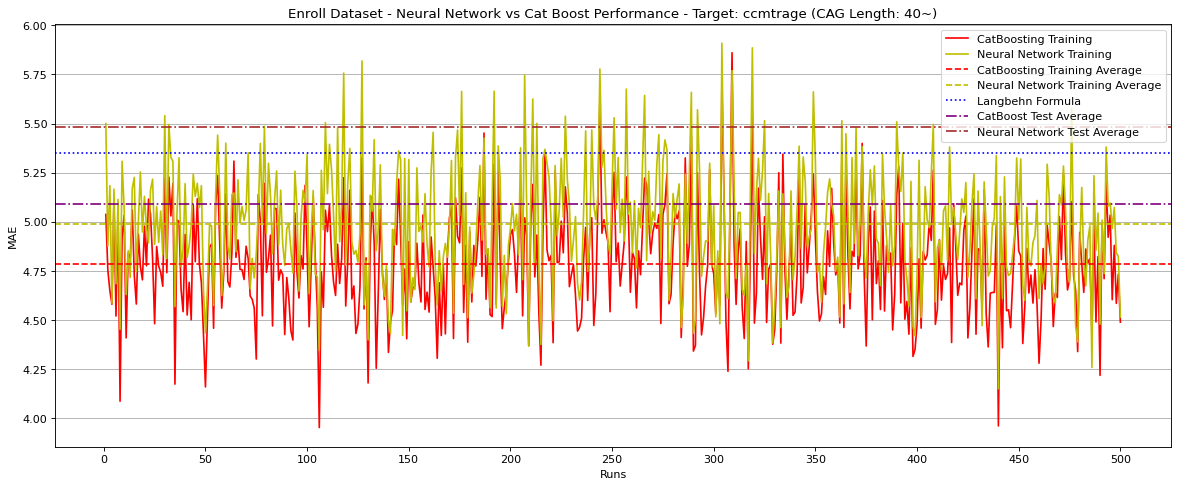

In [77]:
## MAE Graph - CatBoosting vs Neural Network Performance

plt.figure(figsize = (18,7))

plt.plot(runs, mae_c_fs1, 'r', label='CatBoosting Training')
plt.plot(runs, mae_n_fs1, color='y', label='Neural Network Training')
plt.axhline(y = np.nanmean(mae_c_fs1), color='r', linestyle='--', label='CatBoosting Training Average')
plt.axhline(y = np.nanmean(mae_n_fs1), color='y', linestyle='--', label='Neural Network Training Average')
plt.axhline(y = lb_eval[0], color='b', linestyle=':', label='Langbehn Formula')
plt.axhline(y = cb_val['MAE'].values, color='purple', linestyle='dashdot', label='CatBoost Test Average')
plt.axhline(y = nn_val['MAE'].values, color='brown', linestyle='dashdot', label='Neural Network Test Average')

plt.ylabel('MAE')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll Dataset - Neural Network vs Cat Boost Performance - Target: ccmtrage (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()

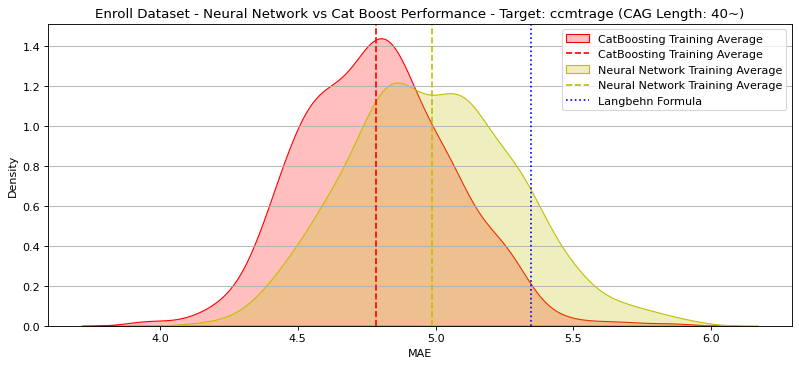

In [78]:
## MAE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(12,5))

sns.kdeplot(cb_df, x="mae", color='r', ax=ax, label='CatBoosting Training Average', fill=True)
plt.axvline(np.nanmean(mae_c_fs1), 0,9, color='r', linestyle='--', label='CatBoosting Training Average')
# plt.axvline(cb_val['MAE'].values, color='purple', linestyle='dashdot', label='CatBoost Test Average')

sns.kdeplot(nn_df, x="mae", color='y',ax=ax, label='Neural Network Training Average', fill=True)
plt.axvline(np.nanmean(mae_n_fs1), 0,9, color='y', linestyle='--', label='Neural Network Training Average')
# plt.axvline(nn_val['MAE'].values, color='black', linestyle='dashdot', label='Neural Network Test Average')

plt.axvline(lb_eval[0], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('MAE')
plt.title('Enroll Dataset - Neural Network vs Cat Boost Performance - Target: ccmtrage (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()


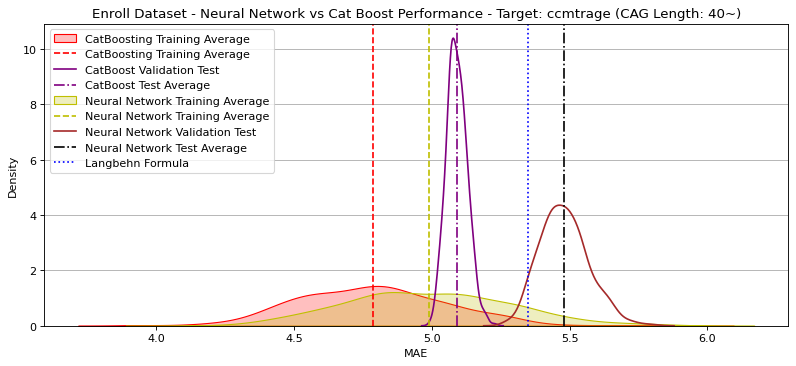

In [79]:
## MAE Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(12,5))

sns.kdeplot(cb_df, x="mae", color='r', ax=ax, label='CatBoosting Training Average', fill=True)
plt.axvline(np.nanmean(mae_c_fs1), 0,9, color='r', linestyle='--', label='CatBoosting Training Average')
sns.kdeplot(cb_val_df, x="mae", color='purple', ax=ax, label='CatBoost Validation Test')
plt.axvline(cb_val['MAE'].values, color='purple', linestyle='dashdot', label='CatBoost Test Average')

sns.kdeplot(nn_df, x="mae", color='y',ax=ax, label='Neural Network Training Average', fill=True)
plt.axvline(np.nanmean(mae_n_fs1), 0,9, color='y', linestyle='--', label='Neural Network Training Average')
sns.kdeplot(nn_val_df, x="mae", color='brown', ax=ax, label='Neural Network Validation Test')
plt.axvline(nn_val['MAE'].values, color='black', linestyle='dashdot', label='Neural Network Test Average')

plt.axvline(lb_eval[0], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('MAE')
plt.title('Enroll Dataset - Neural Network vs Cat Boost Performance - Target: ccmtrage (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()


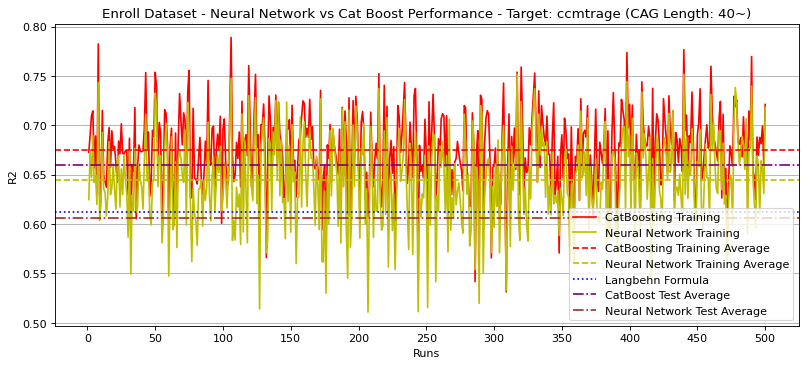

In [80]:
## R2 Graph - CatBoosting vs Neural Network Performance

plt.figure(figsize = (12,5))
plt.plot(runs, r2_c_fs1, 'r', label='CatBoosting Training')
plt.plot(runs, r2_n_fs1, color='y', label='Neural Network Training')
plt.axhline(y = np.nanmean(r2_c_fs1), color='r', linestyle='--', label='CatBoosting Training Average')
plt.axhline(y = np.nanmean(r2_n_fs1), color='y', linestyle='--', label='Neural Network Training Average')
plt.axhline(y = lb_eval[2], color='b', linestyle=':', label='Langbehn Formula')
plt.axhline(y = cb_val['R2'].values, color='purple', linestyle='dashdot', label='CatBoost Test Average')
plt.axhline(y = nn_val['R2'].values, color='brown', linestyle='dashdot', label='Neural Network Test Average')

plt.ylabel('R2')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll Dataset - Neural Network vs Cat Boost Performance - Target: ccmtrage (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()

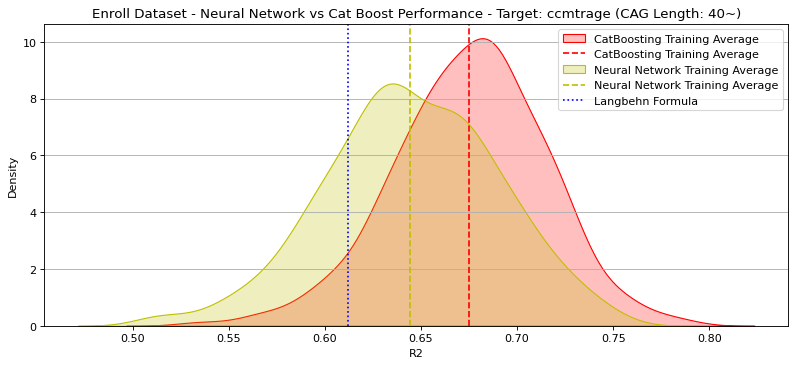

In [81]:
## R2 Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(12,5))

sns.kdeplot(cb_df, x="r2", color='r', ax=ax, label='CatBoosting Training Average', fill=True)
plt.axvline(np.nanmean(r2_c_fs1), 0,9, color='r', linestyle='--', label='CatBoosting Training Average')
# plt.axvline(cb_val['R2'].values, color='purple', linestyle='dashdot', label='CatBoost Test Average')

sns.kdeplot(nn_df, x="r2", color='y',ax=ax, label='Neural Network Training Average', fill=True)
plt.axvline(np.nanmean(r2_n_fs1), 0,9, color='y', linestyle='--', label='Neural Network Training Average')
# plt.axvline(nn_val['R2'].values, color='black', linestyle='dashdot', label='Neural Network Test Average')

plt.axvline(lb_eval[2], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('R2')
plt.title('Enroll Dataset - Neural Network vs Cat Boost Performance - Target: ccmtrage (CAG Length: 40~)')
plt.legend()
plt.grid(axis='y')
plt.show()


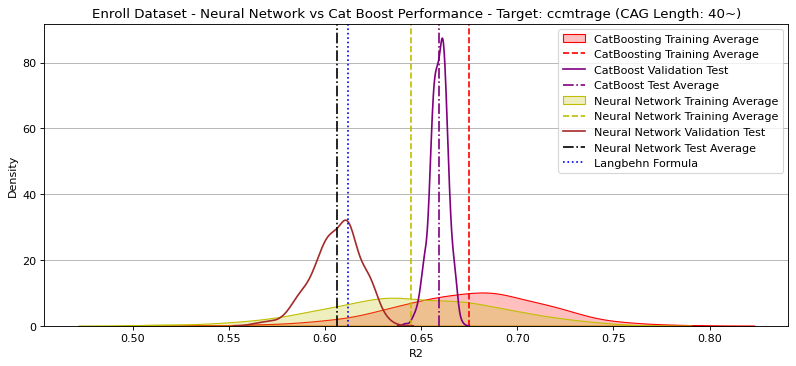

In [82]:
## R2 Graph - CatBoosting vs Neural Network Performance

fig, ax = plt.subplots(1, 1, figsize=(12,5))

sns.kdeplot(cb_df, x="r2", color='r', ax=ax, label='CatBoosting Training Average', fill=True)
plt.axvline(np.nanmean(r2_c_fs1), 0,9, color='r', linestyle='--', label='CatBoosting Training Average')
sns.kdeplot(cb_val_df, x="r2", color='purple', ax=ax, label='CatBoost Validation Test')
plt.axvline(cb_val['R2'].values, color='purple', linestyle='dashdot', label='CatBoost Test Average')

sns.kdeplot(nn_df, x="r2", color='y',ax=ax, label='Neural Network Training Average', fill=True)
plt.axvline(np.nanmean(r2_n_fs1), 0,9, color='y', linestyle='--', label='Neural Network Training Average')
sns.kdeplot(nn_val_df, x="r2", color='brown', ax=ax, label='Neural Network Validation Test')
plt.axvline(nn_val['R2'].values, color='black', linestyle='dashdot', label='Neural Network Test Average')

plt.axvline(lb_eval[2], 0,9, color='b', linestyle=':', label='Langbehn Formula')

plt.xlabel('R2')
plt.title('Enroll Dataset - Neural Network vs Cat Boost Performance - Target: ccmtrage (CAG Length: 40~)')
plt.grid(axis='y')
plt.legend()
plt.show()


In [25]:
## Train the tuned models and send over a validation test set

# Parameters

ml_runs = 500
cag_min = 35
cag_max = 61
runOneHotEnc = 0
target = 'ccmtrage'

# Selections

# selection_1 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
#               'region_impFill']

selection_1 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'nmdrgfrq_filled_impFill']

# ---------------------------------------------------
# Selection 1

num_columns_pp = []
cat_columns_pp = []

for i in selection_1:
    if i in final_feat_df.columns:
        num_columns_pp.append(i)
    else: 
        for variable in final_feat_df.columns:
            if i in variable:
                cat_columns_pp.append(variable)       

cols_fs1 = [num_columns_pp, cat_columns_pp]
NNparams = [125, 10, 2]

fr_cb_fs1, fr_nn_fs1, fr_cb_res_fs1, fr_nn_res_fs1, fr_seed_list, fr_lb_eval, fr_cb_val, fr_nn_val, fr_cb_vaL_res, fr_nn_val_res = aao.tryTwoModels(final_feat_df, ml_runs, cols_fs1, target, cag_min, cag_max, NNparams, runOneHotEnc, validation_df)

print("\nFeature Selection 1")
print("\nCatBoost mean results after", ml_runs, "runs:\n", fr_cb_fs1)
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", fr_nn_fs1)
print("\nLangbehn Calculation (MAE/RMSE/R2):\n", fr_lb_eval)
print("\nCatBoost Validation Test\n", fr_cb_val)
print("\nNeural Network Validation Test\n", fr_nn_val)

Total Patients: 887
6/6 [==============================] - 0s 2ms/step


6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step


320/320 [==============================] - 0s 590us/step

Feature Selection 1

CatBoost mean results after 500 runs:
         MAE      RMSE        R2
0  4.893785  6.329465  0.684663

FeedForward Neural Network mean results after 500 runs:
         MAE     RMSE        R2
0  5.064727  6.58812  0.658432

Langbehn Calculation (MAE/RMSE/R2):
 [5.65551771706097, 7.720896901176953, 0.5482269080755451]

CatBoost Validation Test
         MAE      RMSE        R2
0  5.150306  6.648393  0.665009

Neural Network Validation Test
         MAE      RMSE        R2
0  5.525947  7.143272  0.613196


In [26]:
hd_imputed_df.columns.values

array(['subjid', 'studyid', 'year_seq', 'visdy', 'age', 'pbashalsm_1',
       'pbashalsm_2', 'pbashalsm_3', 'pbashalsm_4', 'pbashalsm_5',
       'hdcat_0', 'hdcat_l', 'sex', 'race', 'caghigh', 'caglow',
       'ccmtrage', 'sxsubj', 'sxfam', 'hddiagn', 'sxrater', 'sxgs',
       'sxgsdy', 'ccdepage', 'ccirbage', 'ccvabage', 'ccaptage',
       'ccpobage', 'ccpsyage', 'cccogage', 'evtnum_filled',
       'hdcat_impFill', 'parenthd_impFill', 'ccmtr_impFill',
       'pbasaptsv_impFill', 'pbasdelfr_impFill', 'pbashalsv_impFill',
       'pbashalfr_impFill', 'swrt_impFill', 'sbh7_impFill',
       'scnt_impFill', 'pbasaptfr_impFill', 'ccvab_impFill',
       'pbasirrsv_impFill', 'ccdep_impFill', 'ccpsy_impFill',
       'cccog_impFill', 'sit_impFill', 'carelevl_impFill',
       'ccapt_impFill', 'sdmt_impFill', 'finances_impFill',
       'pbasaggfr_impFill', 'pbasocsv_impFill', 'ccpob_impFill',
       'occupatn_impFill', 'ccirb_impFill', 'adl_impFill',
       'pbaspersv_impFill', 'pbasirrfr_impFill'

[  56   70  214  525 1510 2339 2680 2310 1773 1244  811  622  414  309
  234  145   95   63   46   33   20   12   14    9    6]
[36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60]
15554
0.7622476533367623


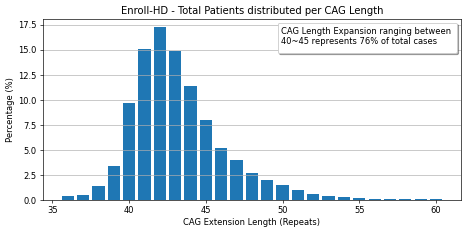

In [17]:
## Counting of Total Patients Enrolled 

x, y = np.unique(hd_imputed_df.groupby('subjid').first()['caghigh'], return_counts=True)

print(y)
print(x)
print(y.sum())
print((y[4]+y[5]+y[6]+y[7]+y[8]+y[9])/y.sum())

fig, axs = plt.subplots(1,1, figsize=(9,4))
plt.bar(x, y*100/(y.sum()))
plt.xlabel('CAG Extension Length (Repeats)')
plt.ylabel('Percentage (%)')
plt.title('Enroll-HD - Total Patients distributed per CAG Length')
plt.legend(title='CAG Length Expansion ranging between \n40~45 represents 76% of total cases', shadow=True)
plt.grid(axis='y')
plt.show()

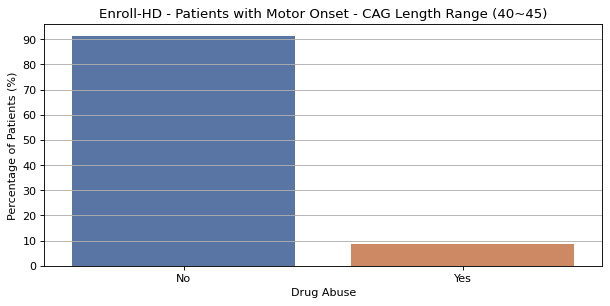

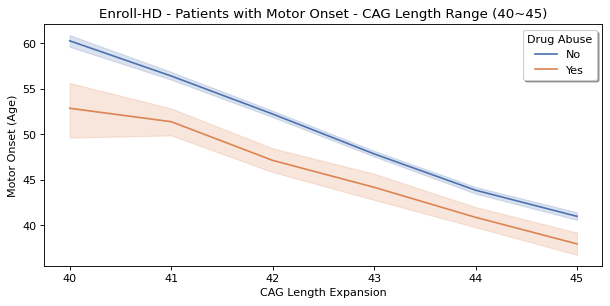

In [84]:
study_df = hd_imputed_df[(hd_imputed_df["ccmtrage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccmtrage', 'nmdrg_filled_impFill']]

study_df['nmdrg_filled_impFill'].replace(0.0, 'No', inplace=True)
study_df['nmdrg_filled_impFill'].replace(1.0, 'Yes', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='nmdrg_filled_impFill', stat="percent", palette='deep')
plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xlabel('Drug Abuse')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccmtrage", hue="nmdrg_filled_impFill", palette='deep')
axs.legend(title='Drug Abuse', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Motor Onset (Age)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()


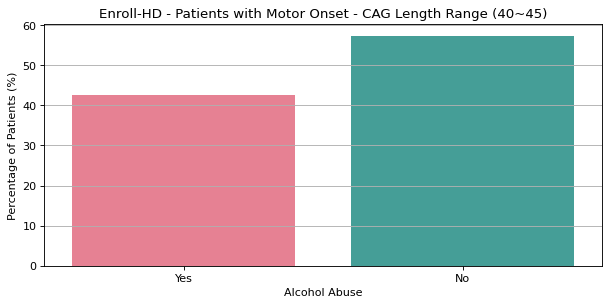

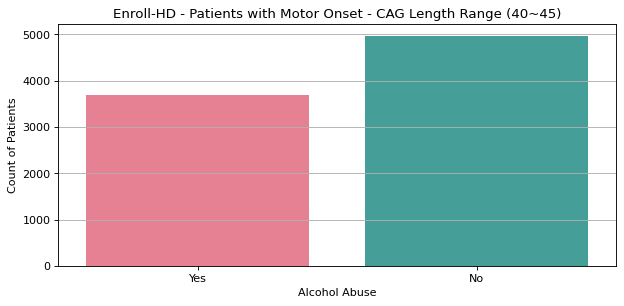

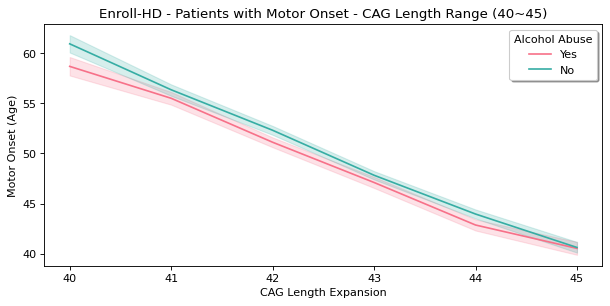

In [85]:
study_df = hd_imputed_df[(hd_imputed_df["ccmtrage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccmtrage', 'alcab_filled_impFill']]

study_df['alcab_filled_impFill'].replace(0.0, 'No', inplace=True)
study_df['alcab_filled_impFill'].replace(1.0, 'Yes', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='alcab_filled_impFill', stat="percent", palette='husl')
plt.yticks(range(0,70,10))
plt.grid(axis='y')
plt.xlabel('Alcohol Abuse')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='alcab_filled_impFill', palette='husl')
# plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xlabel('Alcohol Abuse')
plt.ylabel('Count of Patients')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccmtrage", hue="alcab_filled_impFill", palette='husl')
axs.legend(title='Alcohol Abuse', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Motor Onset (Age)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()


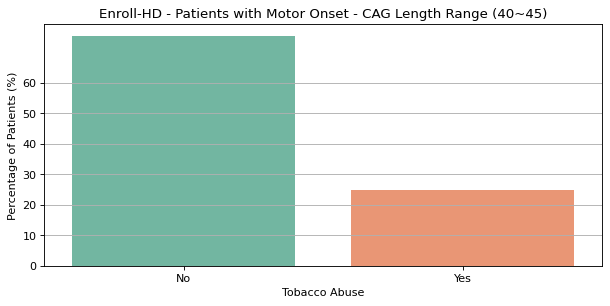

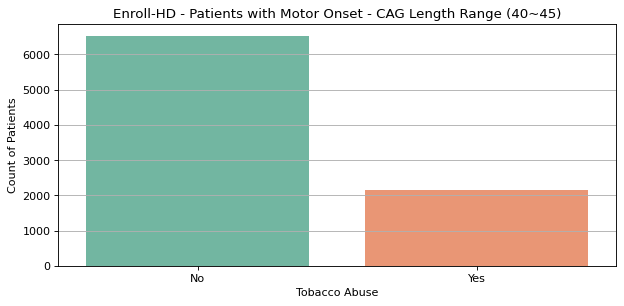

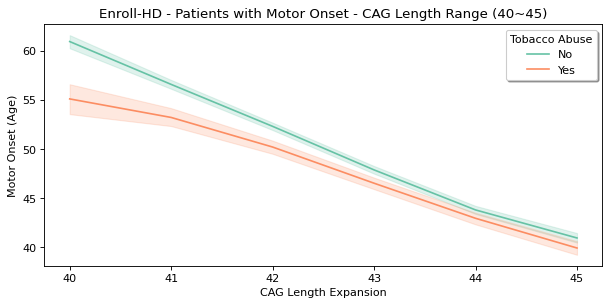

In [86]:
study_df = hd_imputed_df[(hd_imputed_df["ccmtrage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccmtrage', 'tobab_filled_impFill']]

study_df['tobab_filled_impFill'].replace(0.0, 'No', inplace=True)
study_df['tobab_filled_impFill'].replace(1.0, 'Yes', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='tobab_filled_impFill', stat="percent", palette='Set2')
plt.yticks(range(0,70,10))
plt.grid(axis='y')
plt.xlabel('Tobacco Abuse')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='tobab_filled_impFill', palette='Set2')
# plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xlabel('Tobacco Abuse')
plt.ylabel('Count of Patients')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccmtrage", hue="tobab_filled_impFill", palette='Set2')
axs.legend(title='Tobacco Abuse', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Motor Onset (Age)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()


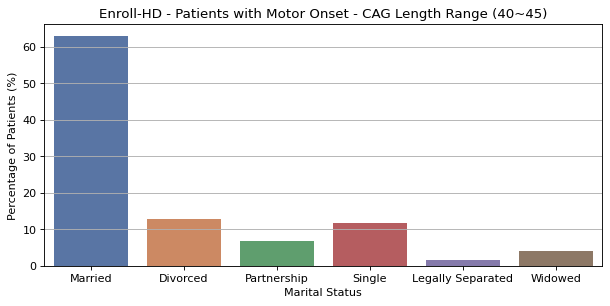

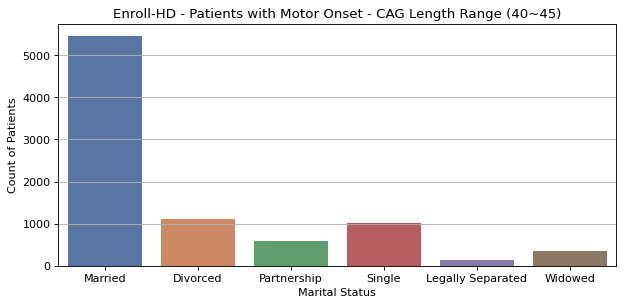

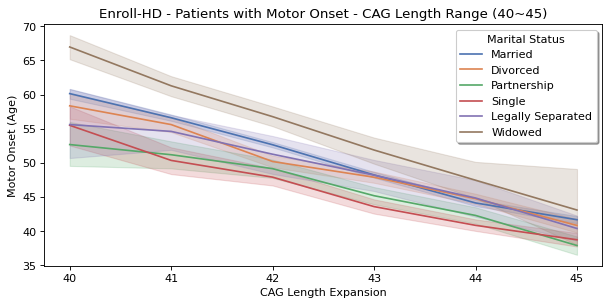

In [87]:
study_df = hd_imputed_df[(hd_imputed_df["ccmtrage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccmtrage', 'maristat_filled_impFill']]

study_df['maristat_filled_impFill'].replace(0.0, 'Single', inplace=True)
study_df['maristat_filled_impFill'].replace(1.0, 'Partnership', inplace=True)
study_df['maristat_filled_impFill'].replace(2.0, 'Married', inplace=True)
study_df['maristat_filled_impFill'].replace(3.0, 'Divorced', inplace=True)
study_df['maristat_filled_impFill'].replace(4.0, 'Widowed', inplace=True)
study_df['maristat_filled_impFill'].replace(5.0, 'Legally Separated', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='maristat_filled_impFill', stat="percent", palette='deep')
plt.yticks(range(0,70,10))
plt.grid(axis='y')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='maristat_filled_impFill', palette='deep')
# plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xlabel('Marital Status')
plt.ylabel('Count of Patients')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccmtrage", hue="maristat_filled_impFill", palette='deep')
axs.legend(title='Marital Status', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Motor Onset (Age)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()


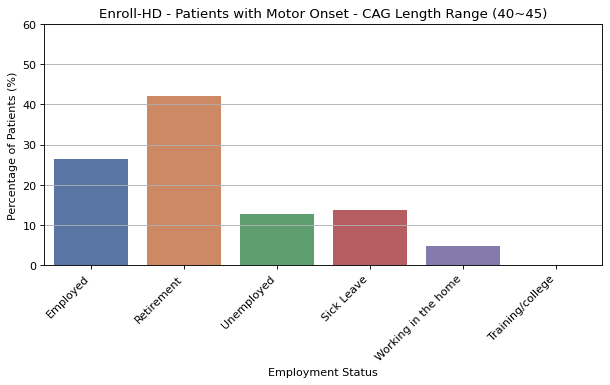

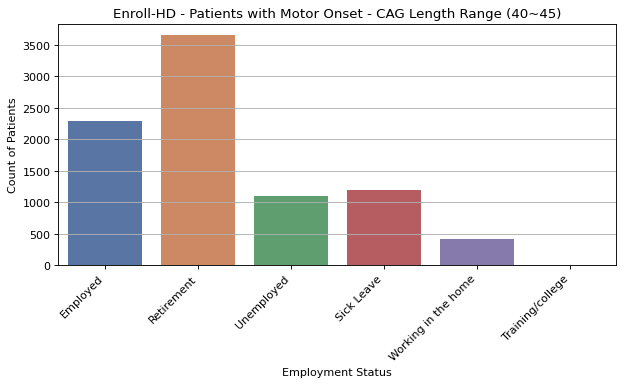

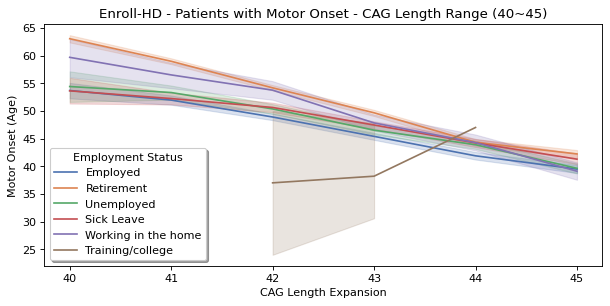

In [88]:
study_df = hd_imputed_df[(hd_imputed_df["ccmtrage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccmtrage', 'emplnrsn_filled_impFill']]

study_df['emplnrsn_filled_impFill'].replace(0.0, 'Sick Leave', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(1.0, 'Retirement', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(2.0, 'Working in the home', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(3.0, 'Unemployed', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(4.0, 'Training/college', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(5.0, 'Employed', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='emplnrsn_filled_impFill', stat="percent", palette='deep')
plt.yticks(range(0,70,10))
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='emplnrsn_filled_impFill', palette='deep')
# plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Count of Patients')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccmtrage", hue="emplnrsn_filled_impFill", palette='deep')
axs.legend(title='Employment Status', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Motor Onset (Age)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()


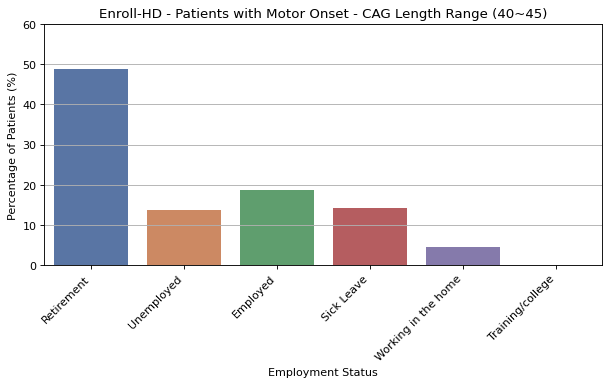

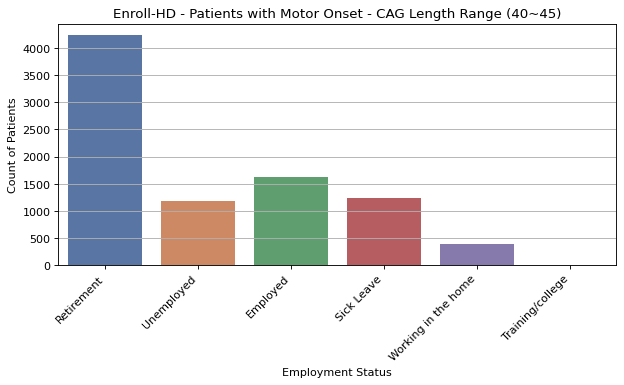

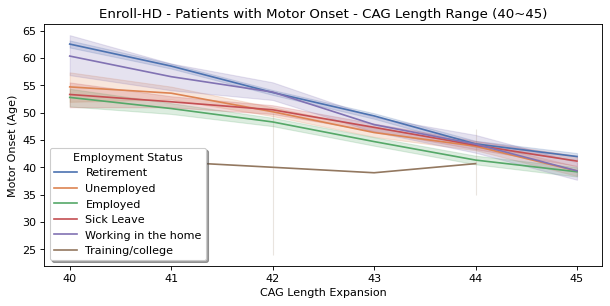

In [89]:
study_df = hd_imputed_df[(hd_imputed_df["ccmtrage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').last()[['caghigh', 'ccmtrage', 'emplnrsn_filled_impFill']]

study_df['emplnrsn_filled_impFill'].replace(0.0, 'Sick Leave', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(1.0, 'Retirement', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(2.0, 'Working in the home', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(3.0, 'Unemployed', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(4.0, 'Training/college', inplace=True)
study_df['emplnrsn_filled_impFill'].replace(5.0, 'Employed', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='emplnrsn_filled_impFill', stat="percent", palette='deep')
plt.yticks(range(0,70,10))
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='emplnrsn_filled_impFill', palette='deep')
# plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Status')
plt.ylabel('Count of Patients')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccmtrage", hue="emplnrsn_filled_impFill", palette='deep')
axs.legend(title='Employment Status', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Motor Onset (Age)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()


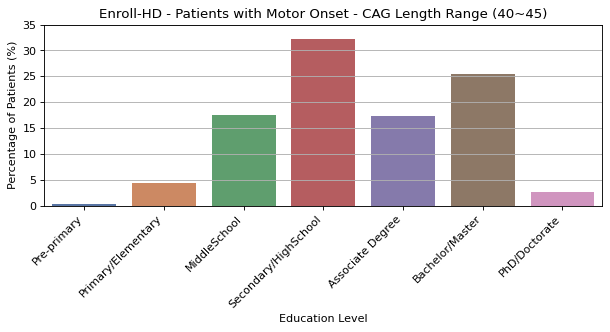

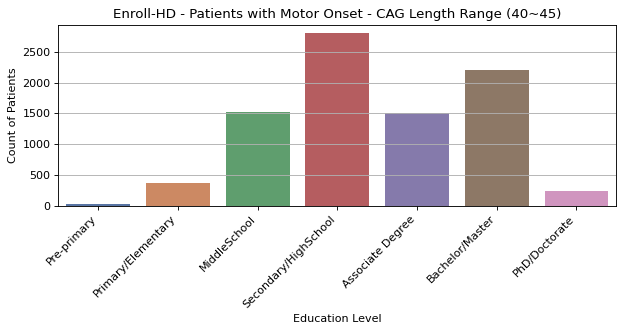

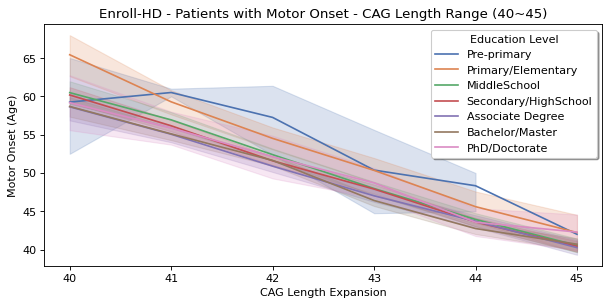

In [90]:
study_df = hd_imputed_df[(hd_imputed_df["ccmtrage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccmtrage', 'isced_filled_impFill']]

study_df['isced_filled_impFill'].replace(0.0, 'Pre-primary', inplace=True)
study_df['isced_filled_impFill'].replace(1.0, 'Primary/Elementary', inplace=True)
study_df['isced_filled_impFill'].replace(2.0, 'MiddleSchool', inplace=True)
study_df['isced_filled_impFill'].replace(3.0, 'Secondary/HighSchool', inplace=True)
study_df['isced_filled_impFill'].replace(4.0, 'Associate Degree', inplace=True)
study_df['isced_filled_impFill'].replace(5.0, 'Bachelor/Master', inplace=True)
study_df['isced_filled_impFill'].replace(6.0, 'PhD/Doctorate', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,3))
sns.countplot(study_df, x='isced_filled_impFill', stat="percent", palette='deep', 
              order=['Pre-primary', 'Primary/Elementary','MiddleSchool','Secondary/HighSchool','Associate Degree',
                     'Bachelor/Master','PhD/Doctorate'])
plt.yticks(range(0,36,5))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,3))
sns.countplot(study_df, x='isced_filled_impFill', palette='deep',
              order=['Pre-primary', 'Primary/Elementary', 'MiddleSchool','Secondary/HighSchool','Associate Degree',
                     'Bachelor/Master','PhD/Doctorate'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.xlabel('Education Level')
plt.ylabel('Count of Patients')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccmtrage", hue="isced_filled_impFill", palette='deep',
            hue_order=['Pre-primary', 'Primary/Elementary', 'MiddleSchool','Secondary/HighSchool','Associate Degree',
                     'Bachelor/Master','PhD/Doctorate'])
axs.legend(title='Education Level', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Motor Onset (Age)')
plt.title('Enroll-HD - Patients with Motor Onset - CAG Length Range (40~45)')
plt.show()


#### Filtering Data - Target: ccdepage 

In [35]:
## Patients considered genetic carrier

feat_model_df = hd_imputed_df[(hd_imputed_df['caghigh'] >= 35)]


In [36]:
## Only manifested patients that were enrolled as pre-manifested

feat_model_df = feat_model_df[(feat_model_df['hdcat_l'] == 3.0) & 
                              (feat_model_df['hdcat_0'] == 2.0) &
                              (feat_model_df['hdcat_impFill'] == 3.0)]


In [37]:
## Create Study Dataset (from PostProcessed training Stage1 file)
## Target: ccmtrage

target_pp = ['ccdepage']
columns_pp = patient_features + lifestyle_features

feat_model_df = feat_model_df.groupby('subjid').first()[target_pp + columns_pp]
feat_model_df = feat_model_df.reset_index()
feat_model_df.dropna(subset = ['ccdepage'], inplace=True)
feat_model_df

,subjid,ccdepage,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
0,1347826,68.0,41,15,1.0,3,59.0,1,0.0,0.0,68.0,167.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2593663,58.0,42,20,1.0,3,60.0,0,0.0,0.0,80.0,178.0,4.0,2.0,3.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5033118,46.0,43,23,1.0,3,43.0,0,0.0,0.0,73.0,183.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0
3,5796487,54.0,42,18,1.0,3,65.0,0,0.0,0.0,68.0,170.0,1.0,3.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,18.0,20.0
4,5895058,44.0,45,25,1.0,1,50.0,0,0.0,0.0,79.4,170.0,5.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,988168309,44.0,42,15,1.0,3,40.0,1,0.0,0.0,70.9,166.0,3.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
883,988240203,55.0,41,17,1.0,3,54.0,1,0.0,0.0,73.0,160.0,3.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
884,988755452,40.0,41,19,1.0,3,54.0,0,0.0,0.0,75.0,180.0,3.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
886,996268693,40.0,46,22,1.0,3,55.0,0,0.0,0.0,71.1,180.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,25.0,1.0,12.0,16.0


In [38]:
## Execute Feature Selection using 3 different Models (SelectKBest, Mutual Information and Lasso)

fs_results_sk, fs_results_mi, fs_results_ls = aao.select_features(feat_model_df, target_pp, columns_pp)

## Percentage Calculation and Agregation of results

fs_results_sk['Select KBest'] = (fs_results_sk['score']*100/fs_results_sk['score'].sum())
fs_results_mi['Mutual Information'] = (fs_results_mi['score']*100/fs_results_mi['score'].sum())
fs_results_ls['Lasso'] = (fs_results_ls['score']*100/fs_results_ls['score'].sum())

fs_results_sk['Cumulative Select KBest'] = fs_results_sk['Select KBest'].cumsum()
fs_results_mi['Cumulative Mutual Information'] = fs_results_mi['Mutual Information'].cumsum()
fs_results_ls['Cumulative Lasso'] = fs_results_ls['Lasso'].cumsum()

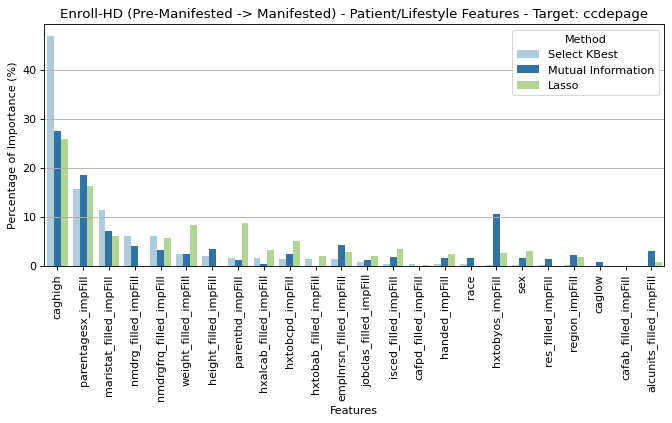

In [91]:
## Graph showing the feature selection results

res1 = pd.merge(fs_results_sk, fs_results_mi, on=['feature'])
res2 = pd.merge(res1, fs_results_ls, on=['feature'])
res2 = res2.drop(columns=['target_x', 'score_x', 'target_y', 'score_y', 'target', 'score'])
res3 = pd.melt(res2[['feature','Select KBest', 'Mutual Information', 'Lasso']], id_vars = "feature")
res3.rename(columns={"variable": "Method"}, inplace=True)
                   
fig, axs = plt.subplots(1, 1, figsize=(10,4))
sns.barplot(data=res3, x="feature", y="value", hue='Method', palette="Paired")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Importance (%)')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Patient/Lifestyle Features - Target: ccdepage')
plt.grid(axis='y')
plt.show()

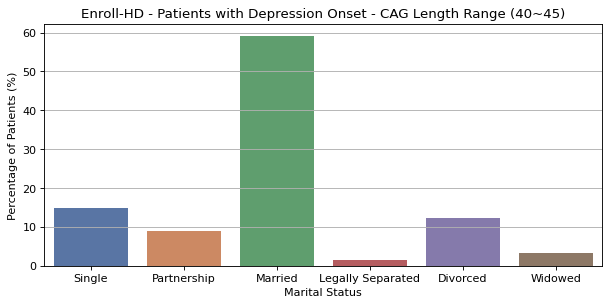

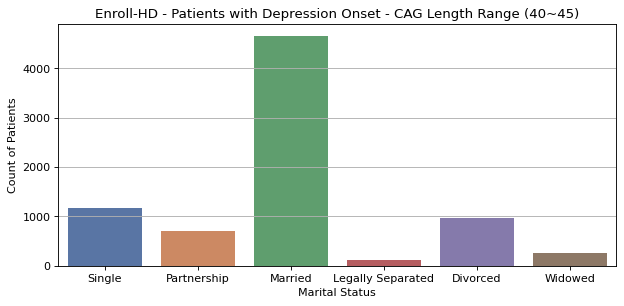

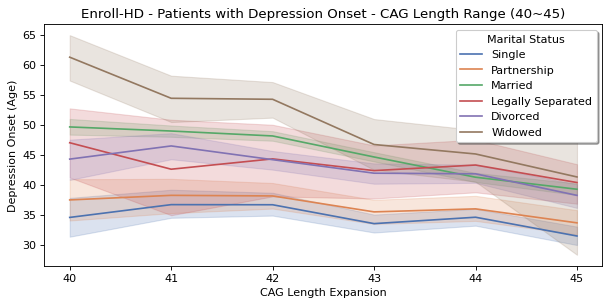

In [92]:
study_df = hd_imputed_df[(hd_imputed_df["ccdepage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccdepage', 'maristat_filled_impFill']]

study_df['maristat_filled_impFill'].replace(0.0, 'Single', inplace=True)
study_df['maristat_filled_impFill'].replace(1.0, 'Partnership', inplace=True)
study_df['maristat_filled_impFill'].replace(2.0, 'Married', inplace=True)
study_df['maristat_filled_impFill'].replace(3.0, 'Divorced', inplace=True)
study_df['maristat_filled_impFill'].replace(4.0, 'Widowed', inplace=True)
study_df['maristat_filled_impFill'].replace(5.0, 'Legally Separated', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='maristat_filled_impFill', stat="percent", palette='deep',
             order=['Single', 'Partnership', 'Married', 'Legally Separated', 'Divorced', 'Widowed'])
plt.yticks(range(0,70,10))
plt.grid(axis='y')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Depression Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='maristat_filled_impFill', palette='deep',
             order=['Single', 'Partnership', 'Married', 'Legally Separated', 'Divorced', 'Widowed'])
# plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xlabel('Marital Status')
plt.ylabel('Count of Patients')
plt.title('Enroll-HD - Patients with Depression Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccdepage", hue="maristat_filled_impFill", palette='deep',
            hue_order=['Single', 'Partnership', 'Married', 'Legally Separated', 'Divorced', 'Widowed'])
axs.legend(title='Marital Status', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Depression Onset (Age)')
plt.title('Enroll-HD - Patients with Depression Onset - CAG Length Range (40~45)')
plt.show()


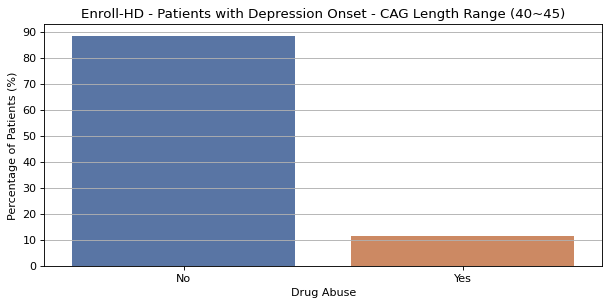

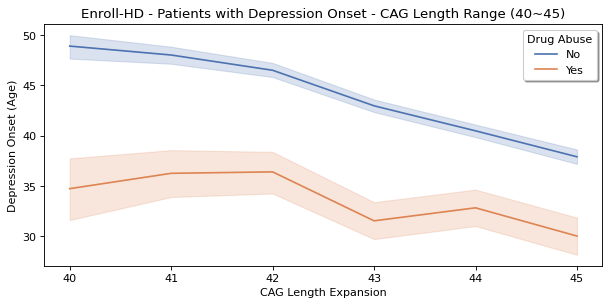

In [93]:
study_df = hd_imputed_df[(hd_imputed_df["ccdepage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccdepage', 'nmdrg_filled_impFill']]

study_df['nmdrg_filled_impFill'].replace(0.0, 'No', inplace=True)
study_df['nmdrg_filled_impFill'].replace(1.0, 'Yes', inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='nmdrg_filled_impFill', stat="percent", palette='deep')
plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xlabel('Drug Abuse')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Depression Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccdepage", hue="nmdrg_filled_impFill", palette='deep')
axs.legend(title='Drug Abuse', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Depression Onset (Age)')
plt.title('Enroll-HD - Patients with Depression Onset - CAG Length Range (40~45)')
plt.show()


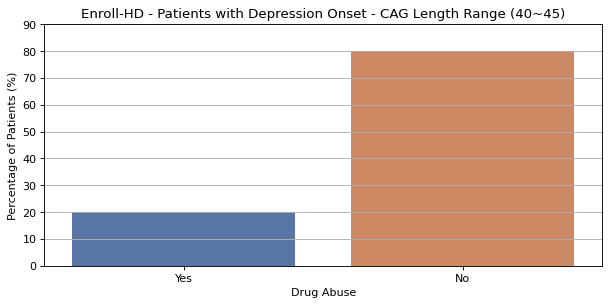

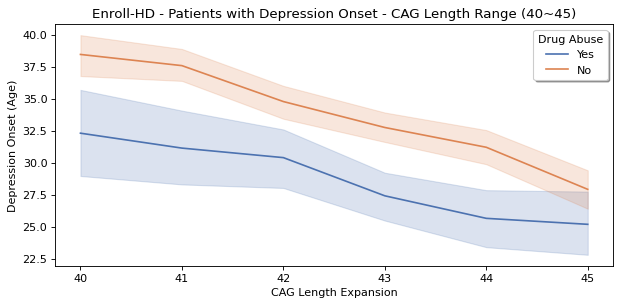

In [94]:
study_df = hd_imputed_df[(hd_imputed_df["ccdepage"]>0)&(hd_imputed_df["caghigh"]>=40)&
                         (hd_imputed_df["caghigh"]<=45)&(hd_imputed_df["hdcat_0"]==2)]

study_df = study_df.groupby('subjid').first()[['caghigh', 'ccdepage', 'nmdrg_filled_impFill']]

study_df['nmdrg_filled_impFill'].replace(0.0, 'No', inplace=True)
study_df['nmdrg_filled_impFill'].replace(1.0, 'Yes', inplace=True)
()
fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.countplot(study_df, x='nmdrg_filled_impFill', stat="percent", palette='deep')
plt.yticks(range(0,100,10))
plt.grid(axis='y')
plt.xlabel('Drug Abuse')
plt.ylabel('Percentage of Patients (%)')
plt.title('Enroll-HD - Patients with Depression Onset - CAG Length Range (40~45)')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=study_df, x="caghigh", y="ccdepage", hue="nmdrg_filled_impFill", palette='deep')
axs.legend(title='Drug Abuse', shadow=True)
plt.xlabel('CAG Length Expansion')
plt.ylabel('Depression Onset (Age)')
plt.title('Enroll-HD - Patients with Depression Onset - CAG Length Range (40~45)')
plt.show()


#### Filtering Data - Target: ccpsyage (only enrolled as pre-manifest)

In [43]:
## Patients considered genetic carrier

feat_model_df = hd_imputed_df[(hd_imputed_df['caghigh'] >= 35)]


In [44]:
## Only manifested patients that were enrolled as pre-manifested

feat_model_df = feat_model_df[(feat_model_df['hdcat_l'] == 3.0) & 
                              (feat_model_df['hdcat_0'] == 2.0) &
                              (feat_model_df['hdcat_impFill'] == 3.0)]


In [45]:
## Create Study Dataset (from PostProcessed training Stage1 file)
## Target: ccmtrage

target_pp = ['ccpsyage']
columns_pp = patient_features + lifestyle_features

feat_model_df = feat_model_df.groupby('subjid').first()[target_pp + columns_pp]
feat_model_df = feat_model_df.reset_index()
feat_model_df.dropna(subset = ['ccpsyage'], inplace=True)
feat_model_df

,subjid,ccpsyage,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
2,5033118,46.0,43,23,1.0,3,43.0,0,0.0,0.0,73.0,183.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0
10,9750601,45.0,42,17,1.0,1,48.0,0,2.0,0.0,92.1,177.8,1.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,10.0,40.0
21,23727860,44.0,42,15,1.0,3,55.0,0,0.0,0.0,64.4,167.6,3.0,3.0,2.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,15.0,20.0
24,25855021,30.0,45,18,1.0,3,30.0,0,0.0,0.0,78.5,180.0,2.0,0.0,1.0,3.0,0.0,1.0,3.0,1.0,1.0,1.0,10.0,1.0,20.0,15.0
31,30421674,46.0,41,16,1.0,3,55.0,1,0.0,0.0,94.4,175.0,5.0,0.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
42,40444696,29.0,48,22,1.0,3,45.0,0,0.0,0.0,80.0,180.0,3.0,2.0,1.0,0.0,5.0,1.0,3.0,1.0,0.0,0.0,3.0,1.0,3.0,1.0
48,48885212,46.0,42,16,1.0,3,69.0,0,0.0,0.0,82.2,182.0,4.0,5.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
60,58919428,54.0,40,21,1.0,3,56.0,1,0.0,0.0,57.0,168.0,2.0,2.0,3.0,3.0,2.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0
100,107814134,50.0,43,16,1.0,3,60.0,0,0.0,0.0,115.0,175.0,2.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
131,130108278,53.0,41,17,1.0,3,50.0,1,0.0,2.0,64.0,151.0,2.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,20.0,35.0


In [46]:
## Execute Feature Selection using 3 different Models (SelectKBest, Mutual Information and Lasso)

fs_results_sk, fs_results_mi, fs_results_ls = aao.select_features(feat_model_df, target_pp, columns_pp)

## Percentage Calculation and Agregation of results

fs_results_sk['Select KBest'] = (fs_results_sk['score']*100/fs_results_sk['score'].sum())
fs_results_mi['Mutual Information'] = (fs_results_mi['score']*100/fs_results_mi['score'].sum())
fs_results_ls['Lasso'] = (fs_results_ls['score']*100/fs_results_ls['score'].sum())

fs_results_sk['Cumulative Select KBest'] = fs_results_sk['Select KBest'].cumsum()
fs_results_mi['Cumulative Mutual Information'] = fs_results_mi['Mutual Information'].cumsum()
fs_results_ls['Cumulative Lasso'] = fs_results_ls['Lasso'].cumsum()

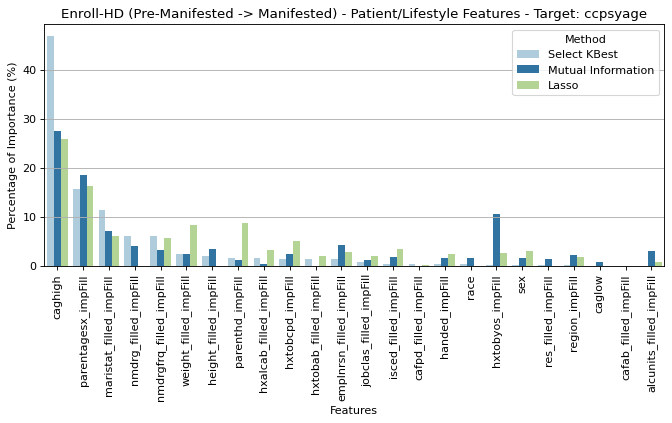

In [95]:
## Graph showing the feature selection results

res1 = pd.merge(fs_results_sk, fs_results_mi, on=['feature'])
res2 = pd.merge(res1, fs_results_ls, on=['feature'])
res2 = res2.drop(columns=['target_x', 'score_x', 'target_y', 'score_y', 'target', 'score'])
res3 = pd.melt(res2[['feature','Select KBest', 'Mutual Information', 'Lasso']], id_vars = "feature")
res3.rename(columns={"variable": "Method"}, inplace=True)
                   
fig, axs = plt.subplots(1, 1, figsize=(10,4))
sns.barplot(data=res3, x="feature", y="value", hue='Method', palette="Paired")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Importance (%)')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Patient/Lifestyle Features - Target: ccpsyage')
plt.grid(axis='y')
plt.show()

#### Filtering Data - Target: ccpsyage (all manifest)

In [48]:
## Patients considered genetic carrier

feat_model_df = hd_imputed_df[(hd_imputed_df['caghigh'] >= 35)]


In [49]:
## Only manifested patients that were enrolled as pre-manifested

feat_model_df = feat_model_df[(feat_model_df['hdcat_l'] == 3.0) &
                              (feat_model_df['hdcat_impFill'] == 3.0)]


In [50]:
## Create Study Dataset (from PostProcessed training Stage1 file)
## Target: ccmtrage

target_pp = ['ccpsyage']
columns_pp = patient_features + lifestyle_features

feat_model_df = feat_model_df.groupby('subjid').first()[target_pp + columns_pp]
feat_model_df = feat_model_df.reset_index()
feat_model_df.dropna(subset = ['ccpsyage'], inplace=True)
feat_model_df

,subjid,ccpsyage,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
4,458994,43.0,45,17,1.0,3,39.0,1,0.0,0.0,68.0,169.0,3.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,832901,51.0,47,18,1.0,3,70.0,1,0.0,0.0,84.4,168.0,5.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1075867,71.0,38,17,1.0,0,74.0,1,5.0,0.0,54.0,151.0,5.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,20.0,53.0
17,1677521,20.0,50,17,1.0,1,26.0,0,0.0,0.0,85.7,180.3,3.0,3.0,1.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,15.0,10.0
18,1707410,45.0,47,18,1.0,3,25.0,0,0.0,0.0,119.0,185.0,5.0,2.0,2.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11099,994495692,72.0,40,19,1.0,0,59.0,0,5.0,0.0,63.0,178.0,5.0,2.0,2.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11102,994612537,60.0,43,17,1.0,1,50.0,0,0.0,0.0,79.6,185.0,4.0,2.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11114,995912466,65.0,40,17,1.0,3,60.0,1,0.0,0.0,62.0,160.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11121,996653931,69.0,41,18,1.0,3,60.0,0,0.0,0.0,79.0,183.0,3.0,2.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
## Execute Feature Selection using 3 different Models (SelectKBest, Mutual Information and Lasso)

fs_results_sk, fs_results_mi, fs_results_ls = aao.select_features(feat_model_df, target_pp, columns_pp)

## Percentage Calculation and Agregation of results

fs_results_sk['Select KBest'] = (fs_results_sk['score']*100/fs_results_sk['score'].sum())
fs_results_mi['Mutual Information'] = (fs_results_mi['score']*100/fs_results_mi['score'].sum())
fs_results_ls['Lasso'] = (fs_results_ls['score']*100/fs_results_ls['score'].sum())

fs_results_sk['Cumulative Select KBest'] = fs_results_sk['Select KBest'].cumsum()
fs_results_mi['Cumulative Mutual Information'] = fs_results_mi['Mutual Information'].cumsum()
fs_results_ls['Cumulative Lasso'] = fs_results_ls['Lasso'].cumsum()

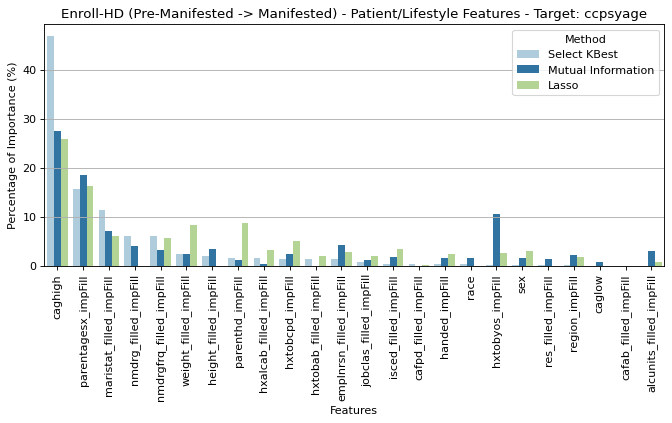

In [96]:
## Graph showing the feature selection results

res1 = pd.merge(fs_results_sk, fs_results_mi, on=['feature'])
res2 = pd.merge(res1, fs_results_ls, on=['feature'])
res2 = res2.drop(columns=['target_x', 'score_x', 'target_y', 'score_y', 'target', 'score'])
res3 = pd.melt(res2[['feature','Select KBest', 'Mutual Information', 'Lasso']], id_vars = "feature")
res3.rename(columns={"variable": "Method"}, inplace=True)
                   
fig, axs = plt.subplots(1, 1, figsize=(10,4))
sns.barplot(data=res3, x="feature", y="value", hue='Method', palette="Paired")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Importance (%)')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Patient/Lifestyle Features - Target: ccpsyage')
plt.grid(axis='y')
plt.show()

## -------------------------------------------------------------------